## Data Dictionary
---

|Feature|Type|Dataset|Description|
|:---|:---|:---|:---|
|**date**|*datetime*|weather|Date when the records were taken| 
|**daily_rainfall_total**|*float*|weather|Total daily rainfall in mm|
|**highest_30_min_rainfall**|*float*|weather|Highest 30min rainfall in mm|
|**highest_60_min_rainfall**|*float*|weather|Highest 60min rainfall in mm|
|**highest_120_min_rainfall**|*float*|weather|Highest 120min rainfall in mm|
|**mean_temperature**|*float*|weather|Mean temperature in °C|
|**maximum_temperature**|*float*|weather|Maximum temperature in °C|
|**minimum_temperature**|*float*|weather|Minimum temperature in °C|
|**mean_wind_speed**|*float*|weather|Mean wind speed in km/h|
|**max_wind_speed**|*float*|weather|Maximum wind speed in km/h|
|**year**|*float*|weather|Year when the records were taken|
|**region**|*string*|weather|Region where the records were taken|

In [238]:
# Import Libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import metrics
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.svm import SVR

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)

# Data Cleaning

In [2]:
# Read merged data.
merged_data = pd.read_csv('../Data/merged_data.csv')
merged_data.head()

,Unnamed: 0,date,daily_rainfall_total,highest_30_min_rainfall,highest_60_min_rainfall,highest_120_min_rainfall,mean_temperature,maximum_temperature,minimum_temperature,mean_wind_speed,max_wind_speed,year,region,daily_rainfall_total_14,highest_30_min_rainfall_14,highest_60_min_rainfall_14,highest_120_min_rainfall_14,mean_temperature_14,maximum_temperature_14,minimum_temperature_14,mean_wind_speed_14,max_wind_speed_14,aedes,dengue,fever,headache,nosebleed,vomit,recent_cases
0,0,2017-01-01,3.0,2.6,2.6,2.6,26.8,30.0,24.7,11.2,40.7,2017,Admiralty,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,27.0,69.0,70.0,0.0,100.0,NaN
1,1,2017-01-02,47.2,32.6,42.2,45.2,26.1,30.5,24.1,6.1,32.0,2017,Admiralty,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2017-01-03,0.6,0.6,0.6,0.6,26.3,30.6,24.5,7.6,27.4,2017,Admiralty,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2017-01-04,2.6,2.4,2.4,2.4,26.6,30.2,23.5,9.0,33.5,2017,Admiralty,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2017-01-05,1.2,0.8,1.0,1.2,27.7,31.4,24.4,8.6,33.5,2017,Admiralty,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130926 entries, 0 to 130925
Data columns (total 29 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   130926 non-null  int64  
 1   date                         130926 non-null  object 
 2   daily_rainfall_total         130926 non-null  float64
 3   highest_30_min_rainfall      130926 non-null  float64
 4   highest_60_min_rainfall      130926 non-null  float64
 5   highest_120_min_rainfall     130926 non-null  float64
 6   mean_temperature             130926 non-null  float64
 7   maximum_temperature          130926 non-null  float64
 8   minimum_temperature          130926 non-null  float64
 9   mean_wind_speed              130926 non-null  float64
 10  max_wind_speed               130926 non-null  float64
 11  year                         130926 non-null  int64  
 12  region                       130926 non-null  object 
 13 

In [4]:
# Remove Unnamed: 0 column and drop null values.
merged_data.drop('Unnamed: 0', axis=1, inplace=True)
cases = merged_data.dropna()
cases.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2027 entries, 28 to 130703
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   date                         2027 non-null   object 
 1   daily_rainfall_total         2027 non-null   float64
 2   highest_30_min_rainfall      2027 non-null   float64
 3   highest_60_min_rainfall      2027 non-null   float64
 4   highest_120_min_rainfall     2027 non-null   float64
 5   mean_temperature             2027 non-null   float64
 6   maximum_temperature          2027 non-null   float64
 7   minimum_temperature          2027 non-null   float64
 8   mean_wind_speed              2027 non-null   float64
 9   max_wind_speed               2027 non-null   float64
 10  year                         2027 non-null   int64  
 11  region                       2027 non-null   object 
 12  daily_rainfall_total_14      2027 non-null   float64
 13  highest_30_min_

In [5]:
# Sort dataframe by date and set date as index.
cases.sort_values(by='date', inplace=True)
cases.set_index('date', inplace=True)

C:\Users\Zeonice\AppData\Local\Temp\ipykernel_15080\2912876388.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cases.sort_values(by='date', inplace=True)


In [6]:
cases.head()

,daily_rainfall_total,highest_30_min_rainfall,highest_60_min_rainfall,highest_120_min_rainfall,mean_temperature,maximum_temperature,minimum_temperature,mean_wind_speed,max_wind_speed,year,region,daily_rainfall_total_14,highest_30_min_rainfall_14,highest_60_min_rainfall_14,highest_120_min_rainfall_14,mean_temperature_14,maximum_temperature_14,minimum_temperature_14,mean_wind_speed_14,max_wind_speed_14,aedes,dengue,fever,headache,nosebleed,vomit,recent_cases
date,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-03,4.8,1.2,1.8,2.4,0.0,0.0,0.0,0.0,0.0,2016,Buangkok,8.642857,4.071429,5.642857,6.828571,0.0,0.0,0.0,0.0,0.0,0.0,78.0,75.0,81.0,0.0,42.0,16.0
2016-01-03,1.4,0.8,1.2,1.4,0.0,0.0,0.0,0.0,0.0,2016,Kampong Bahru,3.957143,2.057143,2.485714,3.214286,0.0,0.0,0.0,0.0,0.0,0.0,78.0,75.0,81.0,0.0,42.0,2.0
2016-01-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016,Buangkok,5.271429,2.142857,2.914286,3.700000,0.0,0.0,0.0,0.0,0.0,6.0,74.0,77.0,76.0,0.0,40.0,27.0
2016-01-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016,Kampong Bahru,4.614286,2.742857,3.085714,3.900000,0.0,0.0,0.0,0.0,0.0,6.0,74.0,77.0,76.0,0.0,40.0,1.0
2016-01-17,18.4,8.2,10.6,15.6,0.0,0.0,0.0,0.0,0.0,2016,Buangkok,2.885714,1.642857,2.242857,2.671429,0.0,0.0,0.0,0.0,0.0,13.0,68.0,88.0,79.0,48.0,70.0,31.0


# Preprocessing

In [7]:
# Retrieve categorical feature.
cases_category = cases.select_dtypes(object)

# Create a list for all the categorical columns.
categories=list(cases_category.columns)

# One-hot encoding categorical features.
cases_ohe = pd.get_dummies(cases, 
                       columns = categories,
                       drop_first=True)

In [8]:
cases_ohe.head()

,daily_rainfall_total,highest_30_min_rainfall,highest_60_min_rainfall,highest_120_min_rainfall,mean_temperature,maximum_temperature,minimum_temperature,mean_wind_speed,max_wind_speed,year,daily_rainfall_total_14,highest_30_min_rainfall_14,highest_60_min_rainfall_14,highest_120_min_rainfall_14,mean_temperature_14,maximum_temperature_14,minimum_temperature_14,mean_wind_speed_14,max_wind_speed_14,aedes,dengue,fever,headache,nosebleed,vomit,recent_cases,region_Ang Mo Kio,region_Botanic Garden,region_Buangkok,region_Bukit Panjang,region_Bukit Timah,region_Buona Vista,region_Chai Chee,region_Changi,region_Choa Chu Kang (Central),region_Clementi,region_Dhoby Ghaut,region_Jurong (West),region_Jurong Island,region_Kampong Bahru,region_Kranji Reservoir,region_Macritchie Reservoir,region_Mandai,region_Marina Barrage,region_Marine Parade,region_Newton,region_Pasir Panjang,region_Pasir Ris (Central),region_Paya Lebar,region_Punggol,region_Queenstown,region_Seletar,region_Sembawang,region_Serangoon,region_Serangoon North,region_Simei,region_Somerset (Road),region_Tai Seng,region_Tengah,region_Toa Payoh,region_Tuas,region_Ulu Pandan,region_Whampoa,region_Yishun
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-03,4.8,1.2,1.8,2.4,0.0,0.0,0.0,0.0,0.0,2016,8.642857,4.071429,5.642857,6.828571,0.0,0.0,0.0,0.0,0.0,0.0,78.0,75.0,81.0,0.0,42.0,16.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2016-01-03,1.4,0.8,1.2,1.4,0.0,0.0,0.0,0.0,0.0,2016,3.957143,2.057143,2.485714,3.214286,0.0,0.0,0.0,0.0,0.0,0.0,78.0,75.0,81.0,0.0,42.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2016-01-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016,5.271429,2.142857,2.914286,3.700000,0.0,0.0,0.0,0.0,0.0,6.0,74.0,77.0,76.0,0.0,40.0,27.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2016-01-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016,4.614286,2.742857,3.085714,3.900000,0.0,0.0,0.0,0.0,0.0,6.0,74.0,77.0,76.0,0.0,40.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2016-01-17,18.4,8.2,10.6,15.6,0.0,0.0,0.0,0.0,0.0,2016,2.885714,1.642857,2.242857,2.671429,0.0,0.0,0.0,0.0,0.0,13.0,68.0,88.0,79.0,48.0,70.0,31.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
# Set up X and y for train test split.
X = cases_ohe.drop(columns='recent_cases')
y = cases_ohe.recent_cases

# Train test split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=12)

In [10]:
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)

(1621, 63)
(406, 63)
(1621,)
(406,)


# Baseline Model

We assume the mean of recent cases to be our baseline model.

In [11]:
# Mean of recent cases as baseline model.
baseline_prediction = cases.recent_cases.mean()
baseline_prediction

16.04588061174149

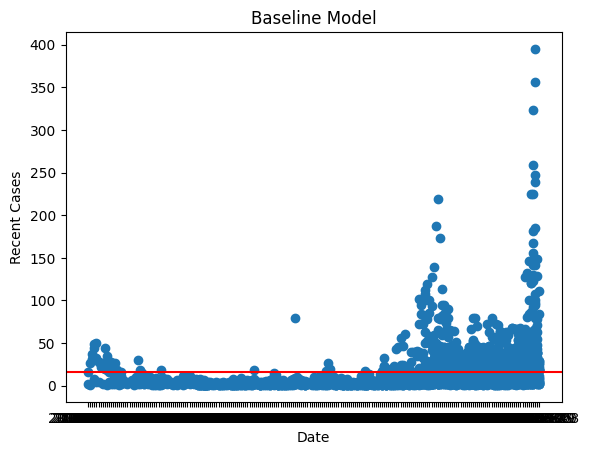

In [12]:
# Scatter plot of recent cases and the baseline model.
plt.scatter(cases.index, cases['recent_cases'])
plt.axhline(baseline_prediction,color = 'red')
plt.xlabel('Date')
plt.ylabel('Recent Cases')
plt.title('Baseline Model');

In [13]:
# Create new column for baseline model.
cases['baseline_prediction'] = baseline_prediction

# Find the RMSE of baseline model.
rmse = mean_squared_error(cases['recent_cases'], cases['baseline_prediction'],squared=False)
print (f'Baseline model RMSE: {rmse}')
cases.drop(columns= ['baseline_prediction'],inplace=True)

Baseline model RMSE: 28.920477985644684


C:\Users\Zeonice\AppData\Local\Temp\ipykernel_15080\1679920601.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cases['baseline_prediction'] = baseline_prediction
C:\Users\Zeonice\AppData\Local\Temp\ipykernel_15080\1679920601.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cases.drop(columns= ['baseline_prediction'],inplace=True)


# Linear Regression

In [220]:
# Pipeline with standard scalar and linear regression.
pipe = Pipeline([
    ('ss', StandardScaler()),
    ('lr', LinearRegression())
])

# Train the model with standardized X_train.
pipe.fit(X_train,y_train)

Pipeline(steps=[('ss', StandardScaler()), ('lr', LinearRegression())])

In [221]:
# Prediction with linear regression.
lr_preds = pipe.predict(X_test)

# RMSE of linear regression.
rmse_lr = mean_squared_error(y_test, lr_preds,squared=False)
print (f'Linear Regression RMSE: {rmse_lr}')

Linear Regression RMSE: 24.518798809299696


The RMSE score is improved by 4.4. Let's see if the model can be further improved with regularization.

C:\Users\Zeonice\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


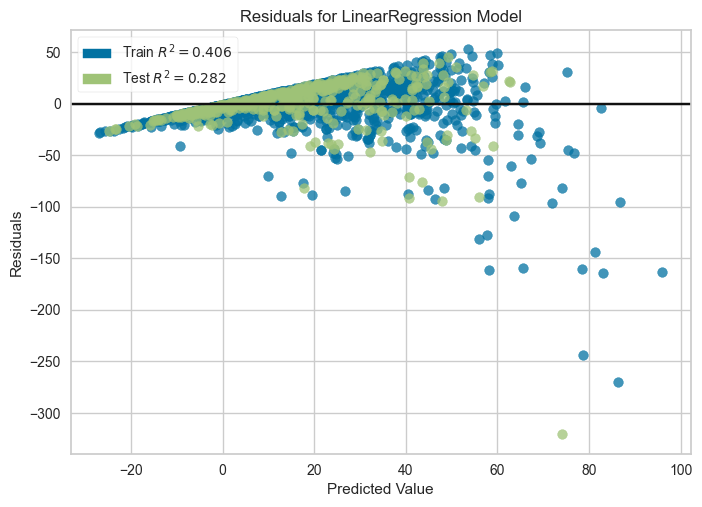

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [222]:
visualizer = ResidualsPlot(pipe, hist=False)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

From the residual plot, the data does not seem to have equal variance.

# ElasticNet

In [16]:
# Set up a list of alphas to check.
enet_alphas = np.linspace(0.3, 1.0, 80)

# Set up our l1 ratio.
enet_ratio = [.1, .5, .7, .9, .95, .99, 1]

In [17]:
# Pipeline with standard scaler and elasticnet.
pipe_enet = Pipeline([
    ('ss', StandardScaler()),
    ('enet', ElasticNet())
])

# Pipeline parameters
pipe_enet_params = {
    'enet__alpha': enet_alphas,
    'enet__l1_ratio': enet_ratio
}

# Gridsearchcv with 5 fold
gs_enet = GridSearchCV(pipe_enet, pipe_enet_params, cv=5, verbose=1)

# Fit model using optimal alpha and l1 ratio.
enet_model = gs_enet.fit(X_train, y_train)

Fitting 5 folds for each of 560 candidates, totalling 2800 fits


In [37]:
# Generate predictions with elasticnet
enet_model_preds = enet_model.predict(X_test)

# Find RMSE of elasticnet model.
rmse_enet = mean_squared_error(y_test, enet_model_preds,squared=False)
print (f'Elasticnet RMSE: {rmse_enet}')

Elasticnet RMSE: 24.39939533229955


RMSE of regularized model is slightly better than previous linear regression model.

In [35]:
print (f'Training score: {enet_model.score(X_train, y_train)}\nTesting score: {enet_model.score(X_test, y_test)}')

Training score: 0.3938082769116765
Testing score: 0.2890474683372668


The training score is very low, one of the reasons is our model is underfitting. We will need to increase the variance to the data by adding more parameters or try to reduce rows. The other reasons could be due to outliers and incomplete data such as temperature and windspeed.

# Data Cleaning and Preprocessing Part 2

In this section, we will first remove outliers and apply log to the target.

In [38]:
# Remove outliers in recent cases.
cases_ohe_nooutl = cases_ohe[cases_ohe['recent_cases']<50]

# Apply log to recent cases.
cases_ohe_nooutl['recent_cases'] = cases_ohe_nooutl['recent_cases'].apply(lambda x: np.log(x))
cases_ohe_nooutl.head()

C:\Users\Zeonice\AppData\Local\Temp\ipykernel_15080\4224384195.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cases_ohe_nooutl['recent_cases'] = cases_ohe_nooutl['recent_cases'].apply(lambda x: np.log(x))


,daily_rainfall_total,highest_30_min_rainfall,highest_60_min_rainfall,highest_120_min_rainfall,mean_temperature,maximum_temperature,minimum_temperature,mean_wind_speed,max_wind_speed,year,daily_rainfall_total_14,highest_30_min_rainfall_14,highest_60_min_rainfall_14,highest_120_min_rainfall_14,mean_temperature_14,maximum_temperature_14,minimum_temperature_14,mean_wind_speed_14,max_wind_speed_14,aedes,dengue,fever,headache,nosebleed,vomit,recent_cases,region_Ang Mo Kio,region_Botanic Garden,region_Buangkok,region_Bukit Panjang,region_Bukit Timah,region_Buona Vista,region_Chai Chee,region_Changi,region_Choa Chu Kang (Central),region_Clementi,region_Dhoby Ghaut,region_Jurong (West),region_Jurong Island,region_Kampong Bahru,region_Kranji Reservoir,region_Macritchie Reservoir,region_Mandai,region_Marina Barrage,region_Marine Parade,region_Newton,region_Pasir Panjang,region_Pasir Ris (Central),region_Paya Lebar,region_Punggol,region_Queenstown,region_Seletar,region_Sembawang,region_Serangoon,region_Serangoon North,region_Simei,region_Somerset (Road),region_Tai Seng,region_Tengah,region_Toa Payoh,region_Tuas,region_Ulu Pandan,region_Whampoa,region_Yishun
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-03,4.8,1.2,1.8,2.4,0.0,0.0,0.0,0.0,0.0,2016,8.642857,4.071429,5.642857,6.828571,0.0,0.0,0.0,0.0,0.0,0.0,78.0,75.0,81.0,0.0,42.0,2.772589,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2016-01-03,1.4,0.8,1.2,1.4,0.0,0.0,0.0,0.0,0.0,2016,3.957143,2.057143,2.485714,3.214286,0.0,0.0,0.0,0.0,0.0,0.0,78.0,75.0,81.0,0.0,42.0,0.693147,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2016-01-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016,5.271429,2.142857,2.914286,3.700000,0.0,0.0,0.0,0.0,0.0,6.0,74.0,77.0,76.0,0.0,40.0,3.295837,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2016-01-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016,4.614286,2.742857,3.085714,3.900000,0.0,0.0,0.0,0.0,0.0,6.0,74.0,77.0,76.0,0.0,40.0,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2016-01-17,18.4,8.2,10.6,15.6,0.0,0.0,0.0,0.0,0.0,2016,2.885714,1.642857,2.242857,2.671429,0.0,0.0,0.0,0.0,0.0,13.0,68.0,88.0,79.0,48.0,70.0,3.433987,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [43]:
cases_ohe_nooutl.shape

(1878, 64)

If we remove outliers, we left with 1878 rows. Total rows reduced by about 10%, so it is not advisable to remove the outliers in recent cases.

In [25]:
# Masks of features.
temp = ['mean_temperature','maximum_temperature','minimum_temperature']
windspeed = ['mean_wind_speed','max_wind_speed']
temp_14 = ['mean_temperature_14','maximum_temperature_14','minimum_temperature_14']
windspeed_14 = ['mean_wind_speed_14','max_wind_speed_14']
rainfall = ['daily_rainfall_total','highest_30_min_rainfall','highest_60_min_rainfall', 'highest_120_min_rainfall']
rainfall_14 = ['daily_rainfall_total_14','highest_30_min_rainfall_14','highest_60_min_rainfall_14', 'highest_120_min_rainfall_14']
google_trend = ['aedes','dengue','fever','headache','nosebleed','vomit']

In [59]:
# Create a copy of dataframe.
cases_p2 = cases_ohe.copy()

In [60]:
# Convert year to distance from 2022.
cases_p2['year'] = cases_p2['year'].map(lambda x: 2022-x)
cases_p2.rename(columns={'year':'year_from_2022'},inplace=True)
cases_p2['year_from_2022'].unique()

array([6, 5, 4, 3, 2], dtype=int64)

In [61]:
cases_p2.head()

,daily_rainfall_total,highest_30_min_rainfall,highest_60_min_rainfall,highest_120_min_rainfall,mean_temperature,maximum_temperature,minimum_temperature,mean_wind_speed,max_wind_speed,year_from_2022,daily_rainfall_total_14,highest_30_min_rainfall_14,highest_60_min_rainfall_14,highest_120_min_rainfall_14,mean_temperature_14,maximum_temperature_14,minimum_temperature_14,mean_wind_speed_14,max_wind_speed_14,aedes,dengue,fever,headache,nosebleed,vomit,recent_cases,region_Ang Mo Kio,region_Botanic Garden,region_Buangkok,region_Bukit Panjang,region_Bukit Timah,region_Buona Vista,region_Chai Chee,region_Changi,region_Choa Chu Kang (Central),region_Clementi,region_Dhoby Ghaut,region_Jurong (West),region_Jurong Island,region_Kampong Bahru,region_Kranji Reservoir,region_Macritchie Reservoir,region_Mandai,region_Marina Barrage,region_Marine Parade,region_Newton,region_Pasir Panjang,region_Pasir Ris (Central),region_Paya Lebar,region_Punggol,region_Queenstown,region_Seletar,region_Sembawang,region_Serangoon,region_Serangoon North,region_Simei,region_Somerset (Road),region_Tai Seng,region_Tengah,region_Toa Payoh,region_Tuas,region_Ulu Pandan,region_Whampoa,region_Yishun
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-03,4.8,1.2,1.8,2.4,0.0,0.0,0.0,0.0,0.0,6,8.642857,4.071429,5.642857,6.828571,0.0,0.0,0.0,0.0,0.0,0.0,78.0,75.0,81.0,0.0,42.0,16.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2016-01-03,1.4,0.8,1.2,1.4,0.0,0.0,0.0,0.0,0.0,6,3.957143,2.057143,2.485714,3.214286,0.0,0.0,0.0,0.0,0.0,0.0,78.0,75.0,81.0,0.0,42.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2016-01-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,5.271429,2.142857,2.914286,3.700000,0.0,0.0,0.0,0.0,0.0,6.0,74.0,77.0,76.0,0.0,40.0,27.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2016-01-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,4.614286,2.742857,3.085714,3.900000,0.0,0.0,0.0,0.0,0.0,6.0,74.0,77.0,76.0,0.0,40.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2016-01-17,18.4,8.2,10.6,15.6,0.0,0.0,0.0,0.0,0.0,6,2.885714,1.642857,2.242857,2.671429,0.0,0.0,0.0,0.0,0.0,13.0,68.0,88.0,79.0,48.0,70.0,31.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [62]:
# Function to convert temperature data from 0 to null values for fillna later.
def replace_to_null (df, columns):
    df[columns] = df[columns].replace(0.0,np.nan)
    return df[columns]

# Convert to null values.
for c in [temp, windspeed, temp_14, windspeed_14]:
    cases_p2[c] = replace_to_null(cases_p2, c)
    
# Fillna with mean of column.
for col in cases_p2.columns:
    cases_p2[col].fillna(cases_p2[col].mean(), inplace=True)


In [63]:
# Set up X and y for train test split.
X2 = cases_p2.drop(columns='recent_cases')
y2 = np.log(cases_p2.recent_cases)

# Train test split.
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2,random_state=12)

In [137]:
# Train the model with new data.
pipe.fit(X_train2, y_train2)

# Prediction with linear regression.
lr_preds2 = pipe.predict(X_test2)

# RMSE of linear regression.
rmse_lr2 = mean_squared_error(np.exp(y_test2), np.exp(lr_preds2),squared=False)
print (f'Linear Regression RMSE: {rmse_lr2}')

print (f'Training score: {pipe.score(X_train2, y_train2)}\nTesting score: {pipe.score(X_test2, y_test2)}')

Linear Regression RMSE: 23.965287863645994
Training score: 0.5540691357514873
Testing score: 0.5241390049343946


In [138]:
p2_coefs2 = pd.DataFrame({'feature':X2.columns,'coefficient':pipe['lr'].coef_})
p2_coefs2.sort_values(by='coefficient',ascending=False).head()

,feature,coefficient
20,dengue,0.576754
12,highest_60_min_rainfall_14,0.360951
15,maximum_temperature_14,0.250159
31,region_Chai Chee,0.220621
25,region_Ang Mo Kio,0.147999


Only dengue features are having coefficient higher than 0.5 and the other features have very low coefficient. However, all features have low coefficient which resulted to difficulty in modelling data.

In [91]:
X3 = X2.copy()
X3['rain_temp'] = (X3['highest_60_min_rainfall_14']*X3['maximum_temperature_14'])**2
X3['rain_wind'] = X3['highest_60_min_rainfall_14']*X3['mean_wind_speed_14']
X3['temp_wind'] = X3['maximum_temperature_14']*X3['mean_wind_speed_14']
X3['dengue_rain'] = X3['dengue']*X3['highest_60_min_rainfall_14']

In [92]:
# Train test split.
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y2, test_size=0.2,random_state=12)

In [93]:
X3.head()

,daily_rainfall_total,highest_30_min_rainfall,highest_60_min_rainfall,highest_120_min_rainfall,mean_temperature,maximum_temperature,minimum_temperature,mean_wind_speed,max_wind_speed,year_from_2022,daily_rainfall_total_14,highest_30_min_rainfall_14,highest_60_min_rainfall_14,highest_120_min_rainfall_14,mean_temperature_14,maximum_temperature_14,minimum_temperature_14,mean_wind_speed_14,max_wind_speed_14,aedes,dengue,fever,headache,nosebleed,vomit,region_Ang Mo Kio,region_Botanic Garden,region_Buangkok,region_Bukit Panjang,region_Bukit Timah,region_Buona Vista,region_Chai Chee,region_Changi,region_Choa Chu Kang (Central),region_Clementi,region_Dhoby Ghaut,region_Jurong (West),region_Jurong Island,region_Kampong Bahru,region_Kranji Reservoir,region_Macritchie Reservoir,region_Mandai,region_Marina Barrage,region_Marine Parade,region_Newton,region_Pasir Panjang,region_Pasir Ris (Central),region_Paya Lebar,region_Punggol,region_Queenstown,region_Seletar,region_Sembawang,region_Serangoon,region_Serangoon North,region_Simei,region_Somerset (Road),region_Tai Seng,region_Tengah,region_Toa Payoh,region_Tuas,region_Ulu Pandan,region_Whampoa,region_Yishun,rain_temp,rain_wind,temp_wind,dengue_rain
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-03,4.8,1.2,1.8,2.4,28.193243,32.271927,25.675581,9.260488,33.216045,6,8.642857,4.071429,5.642857,6.828571,27.324288,30.853467,24.489004,9.021793,32.678637,0.0,78.0,75.0,81.0,0.0,42.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,30311.403370,50.908688,278.353585,440.142857
2016-01-03,1.4,0.8,1.2,1.4,28.193243,32.271927,25.675581,9.260488,33.216045,6,3.957143,2.057143,2.485714,3.214286,27.324288,30.853467,24.489004,9.021793,32.678637,0.0,78.0,75.0,81.0,0.0,42.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5881.801304,22.425599,278.353585,193.885714
2016-01-10,0.0,0.0,0.0,0.0,28.193243,32.271927,25.675581,9.260488,33.216045,6,5.271429,2.142857,2.914286,3.700000,27.324288,30.853467,24.489004,9.021793,32.678637,6.0,74.0,77.0,76.0,0.0,40.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8084.854111,26.292082,278.353585,215.657143
2016-01-10,0.0,0.0,0.0,0.0,28.193243,32.271927,25.675581,9.260488,33.216045,6,4.614286,2.742857,3.085714,3.900000,27.324288,30.853467,24.489004,9.021793,32.678637,6.0,74.0,77.0,76.0,0.0,40.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9063.988692,27.838675,278.353585,228.342857
2016-01-17,18.4,8.2,10.6,15.6,28.193243,32.271927,25.675581,9.260488,33.216045,6,2.885714,1.642857,2.242857,2.671429,27.324288,30.853467,24.489004,9.021793,32.678637,13.0,68.0,88.0,79.0,48.0,70.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4788.628628,20.234593,278.353585,152.514286


In [218]:
# Train the model with new data which has more variance.
lr=LinearRegression()
lr.fit(X_train3, y_train3)

# Prediction with linear regression.
lr_preds3 = lr.predict(X_test3)

# RMSE of linear regression.
rmse_lr3 = mean_squared_error(np.exp(y_test3), np.exp(lr_preds3),squared=False)
print (f'Linear Regression RMSE: {rmse_lr3}')

print (f'Training score: {lr.score(X_train3, y_train3)}\nTesting score: {lr.score(X_test3, y_test3)}')

Linear Regression RMSE: 23.69820766452052
Training score: 0.5579048210586353
Testing score: 0.5287582416990212


C:\Users\Zeonice\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


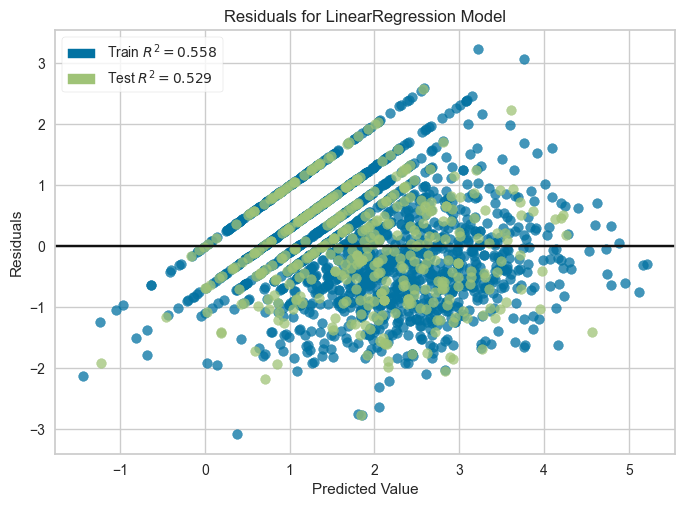

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [219]:
visualizer = ResidualsPlot(lr, hist=False)
visualizer.fit(X_train3, y_train3)
visualizer.score(X_test3, y_test3)
visualizer.show()

Adding more features to the data does not seem to increase the training score. We would probably need more data in order to have a good linear regression model. We should try to model with different algorithm.

# SVR

In [268]:
pipe_svr=Pipeline([
    ('ss', StandardScaler()),
    ('svr', SVR())
])

# Pipeline parameters
pipe_svr_params = {
    'svr__gamma': ['scale', 'auto'],
    'svr__kernel': ['poly','rbf', 'sigmoid', 'linear'],
    'svr__tol': [1e-3, 1e-4, 1e-5]
}

# Perform Gridsearch with 3 fold cross validation
gs_svr = GridSearchCV(pipe_svr, pipe_svr_params, cv=3, verbose=1)

In [269]:
# Train the model
gs_svr.fit(X_train3, y_train3);

# Prediction with linear regression.
svr_preds3 = gs_svr.predict(X_test3)

# RMSE of linear regression.
rmse_svr3 = mean_squared_error((np.exp(y_test3)-1), (np.exp(svr_preds3)-1),squared=False)
print (f'Linear Regression RMSE: {rmse_svr3}')

print (f'Training score: {gs_svr.score(X_train3, y_train3)}\nTesting score: {gs_svr.score(X_test3, y_test3)}')

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Linear Regression RMSE: 21.318456901321074
Training score: 0.7033143329286234
Testing score: 0.5523453368325724


SVM is able to improve the R2 score and slightle lower RMSE.

In [270]:
gs_svr.best_params_

{'svr__gamma': 'auto', 'svr__kernel': 'rbf', 'svr__tol': 0.001}